In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("spotify.csv")

In [8]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [10]:
df.shape

(440, 5)

In [12]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [18]:
df.duplicated().sum()

27

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [32]:
df["Artist"].duplicated().sum()

325

In [34]:
df.drop_duplicates(inplace = True)

In [36]:
df.shape

(413, 5)

In [38]:
df.reset_index(drop = True,inplace = True)

In [43]:
#1  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

In [51]:
for i in df.columns:
    print(f"{i}, duplicated : {df[i].duplicated().sum()}")
    print()
    print(f"{i}, null : {df[i].isnull().sum()}")
    print()

Artist, duplicated : 298

Artist, null : 0

Track Name, duplicated : 1

Track Name, null : 0

Popularity, duplicated : 362

Popularity, null : 0

Duration (ms), duplicated : 3

Duration (ms), null : 0

Track ID, duplicated : 0

Track ID, null : 0



In [57]:
df["Artist"].value_counts()

Artist
Drake             17
Eminem            11
Flo Rida          10
Ludacris          10
Timbaland         10
                  ..
Arizona Zervas     1
Fivio Foreign      1
Pressa             1
David Guetta       1
Diddy              1
Name: count, Length: 115, dtype: int64

In [59]:
#2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

<Axes: xlabel='Popularity', ylabel='Density'>

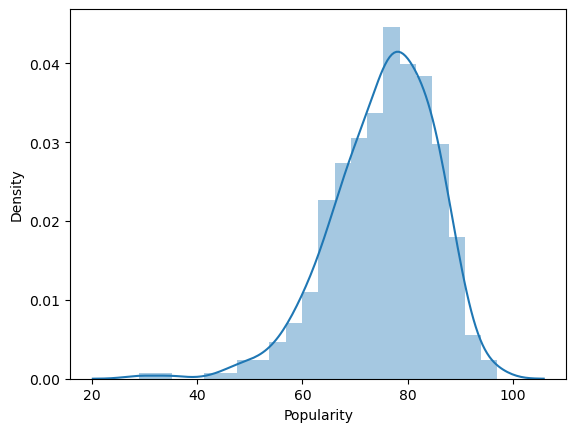

In [65]:
sns.distplot(df["Popularity"])

In [67]:
#3 Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

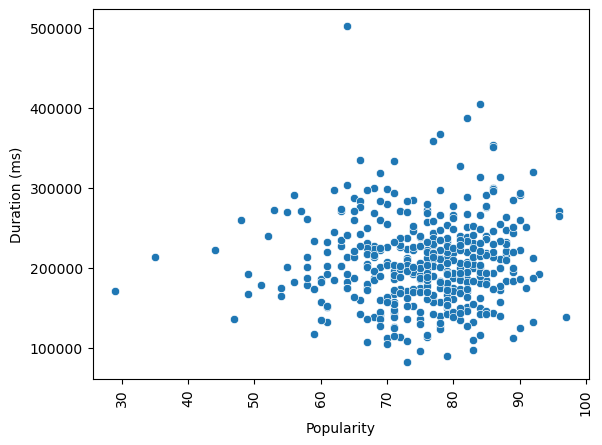

In [89]:

sns.scatterplot(x = df["Popularity"], y = df["Duration (ms)"])
plt.xticks(rotation = 90)
plt.show()

In [91]:
#as popularity increase and slight increase in duration

In [93]:
#4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

In [136]:
data = df["Artist"].value_counts().reset_index()
data

,Artist,count
0,Drake,17
1,Eminem,11
2,Flo Rida,10
3,Ludacris,10
4,Timbaland,10
...,...,...
110,Arizona Zervas,1
111,Fivio Foreign,1
112,Pressa,1
113,David Guetta,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Drake'),
  Text(1, 0, 'Eminem'),
  Text(2, 0, 'Flo Rida'),
  Text(3, 0, 'Ludacris'),
  Text(4, 0, 'Timbaland'),
  Text(5, 0, '¥$'),
  Text(6, 0, '21 Savage'),
  Text(7, 0, 'JAY-Z'),
  Text(8, 0, 'Lil Nas X'),
  Text(9, 0, 'Travis Scott')])

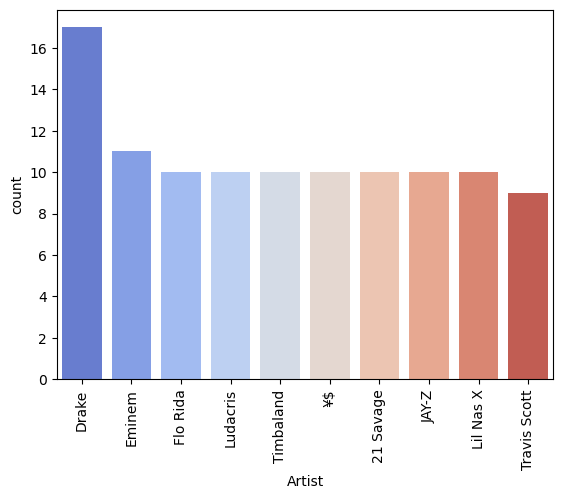

In [144]:
sns.barplot(x = data["Artist"].iloc[:10], y = data["count"],palette = "coolwarm")
plt.xticks(rotation = 90)

In [146]:
#5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [154]:
df.groupby(["Artist","Track Name"])["Popularity"].count().sort_values(ascending = True).reset_index()[:5]

,Artist,Track Name,Popularity
0,*NSYNC,Better Place (Reunion),1
1,Metro Boomin,Annihilate (Spider-Man: Across the Spider-Vers...,1
2,Megan Thee Stallion,Thot Shit,1
3,Megan Thee Stallion,Sweetest Pie,1
4,Megan Thee Stallion,HISS,1


In [156]:
#6  Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

In [168]:
df.groupby("Artist").agg({"Popularity":"sum"}).sort_values(by = "Popularity",ascending = False)[:5]

,Popularity
Artist,
Drake,1409
Eminem,920
¥$,851
21 Savage,838
Flo Rida,780


In [172]:
#7  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [220]:
df[df["Artist"].isin(["Drake","Eminem","¥$","21 Savage","Flo Rida"])]["Track Name"]

0                Rich Baby Daddy (feat. Sexyy Red & SZA)
1                                              One Dance
2                                     IDGAF (feat. Yeat)
3                   First Person Shooter (feat. J. Cole)
4                          Jimmy Cooks (feat. 21 Savage)
5                                             God's Plan
6                                           Passionfruit
8                         Fair Trade (with Travis Scott)
9                                              Rich Flex
34                                               née-nah
60                                               Forever
68                                                redrum
70                                              n.h.i.e.
71                                       Glock In My Lap
72                                             all of me
73                                          ball w/o you
74                                              prove it
75                             

In [197]:
#8 Visualize relationships between multiple numerical variables simultaneously using a pair plot

In [205]:
nume = df.select_dtypes(include = "int")
nume

,Popularity,Duration (ms)
0,92,319191
1,91,173986
2,90,260111
3,88,247444
4,88,218364
...,...,...
408,54,163971
409,65,187521
410,64,191900
411,69,283693


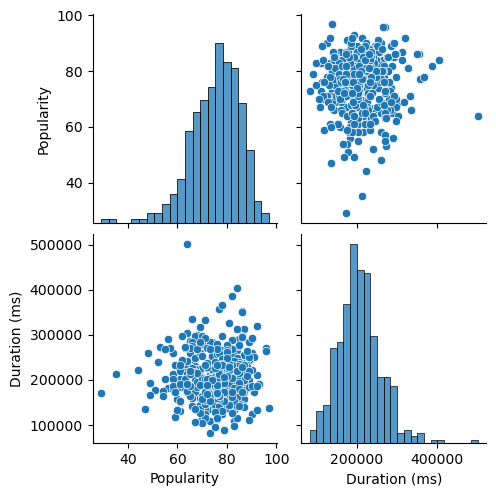

In [207]:
sns.pairplot(nume)

In [222]:
#9  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

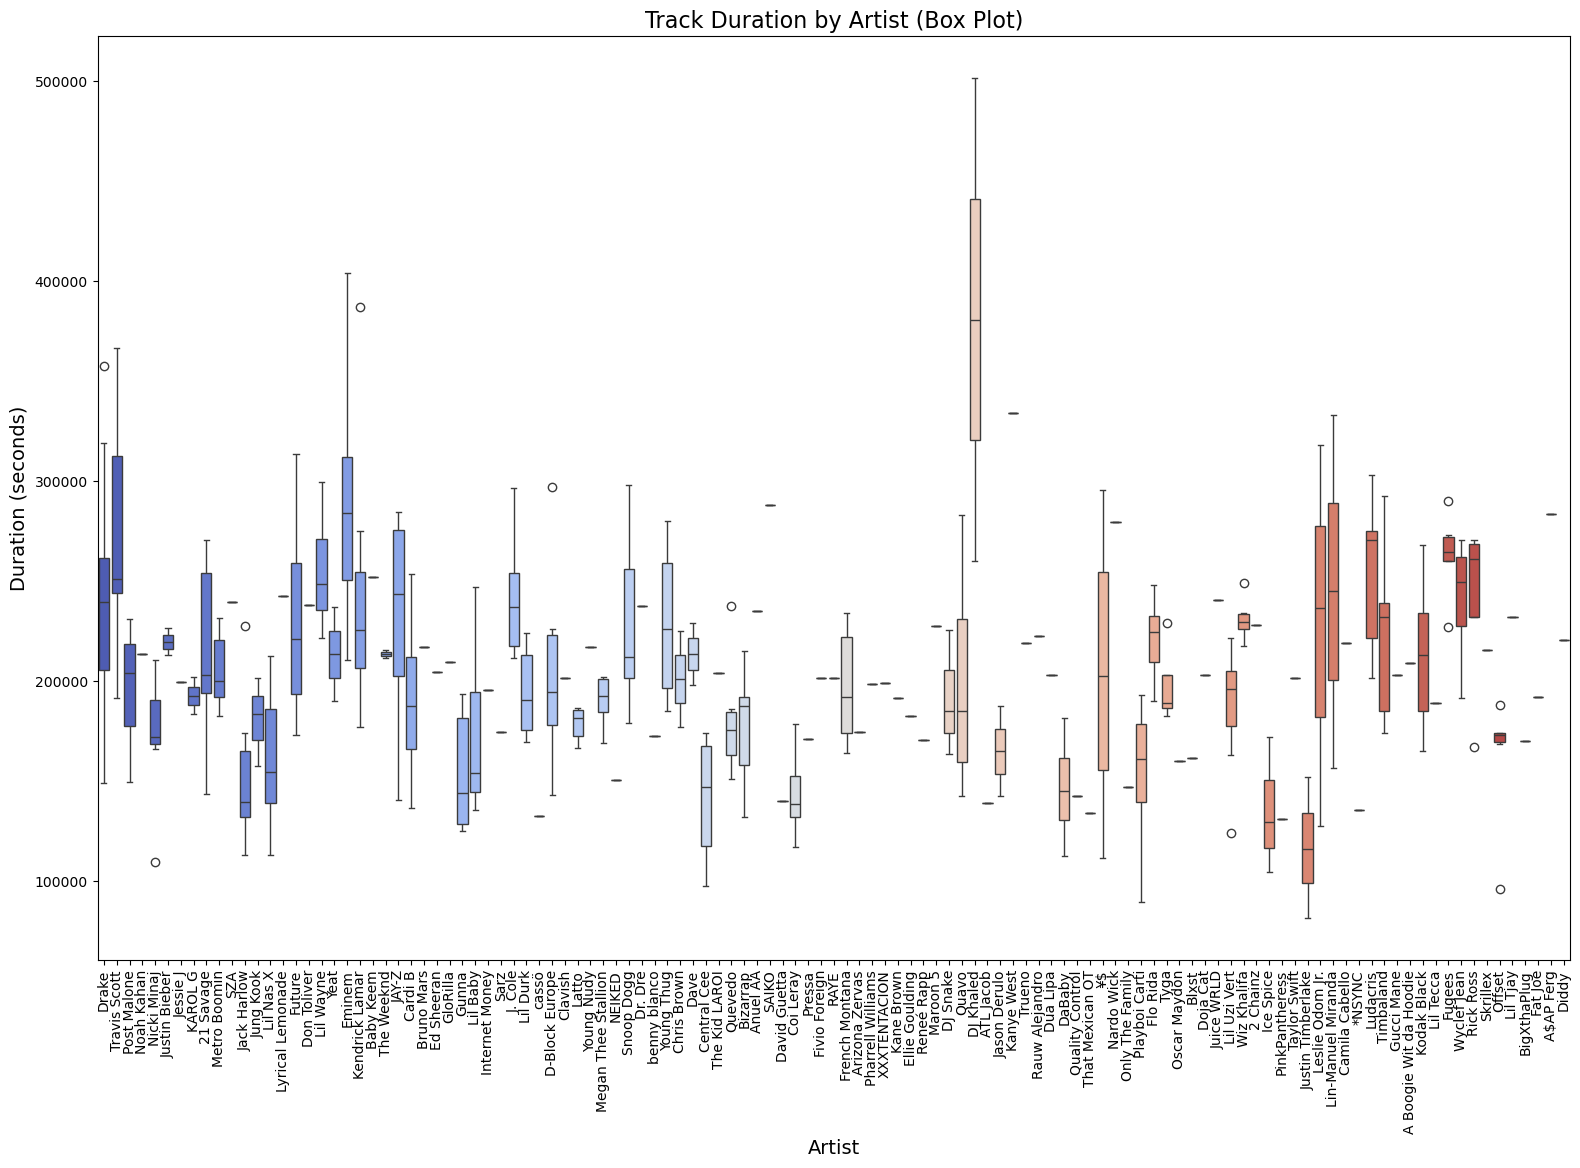

In [261]:
plt.figure(figsize=(19, 12))
sns.boxplot(x='Artist', y='Duration (ms)', data=df, palette='coolwarm')
plt.title('Track Duration by Artist (Box Plot)', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.xticks(rotation = 90)
plt.ylabel('Duration (seconds)', fontsize=14)
plt.show()

In [263]:
#10  How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot

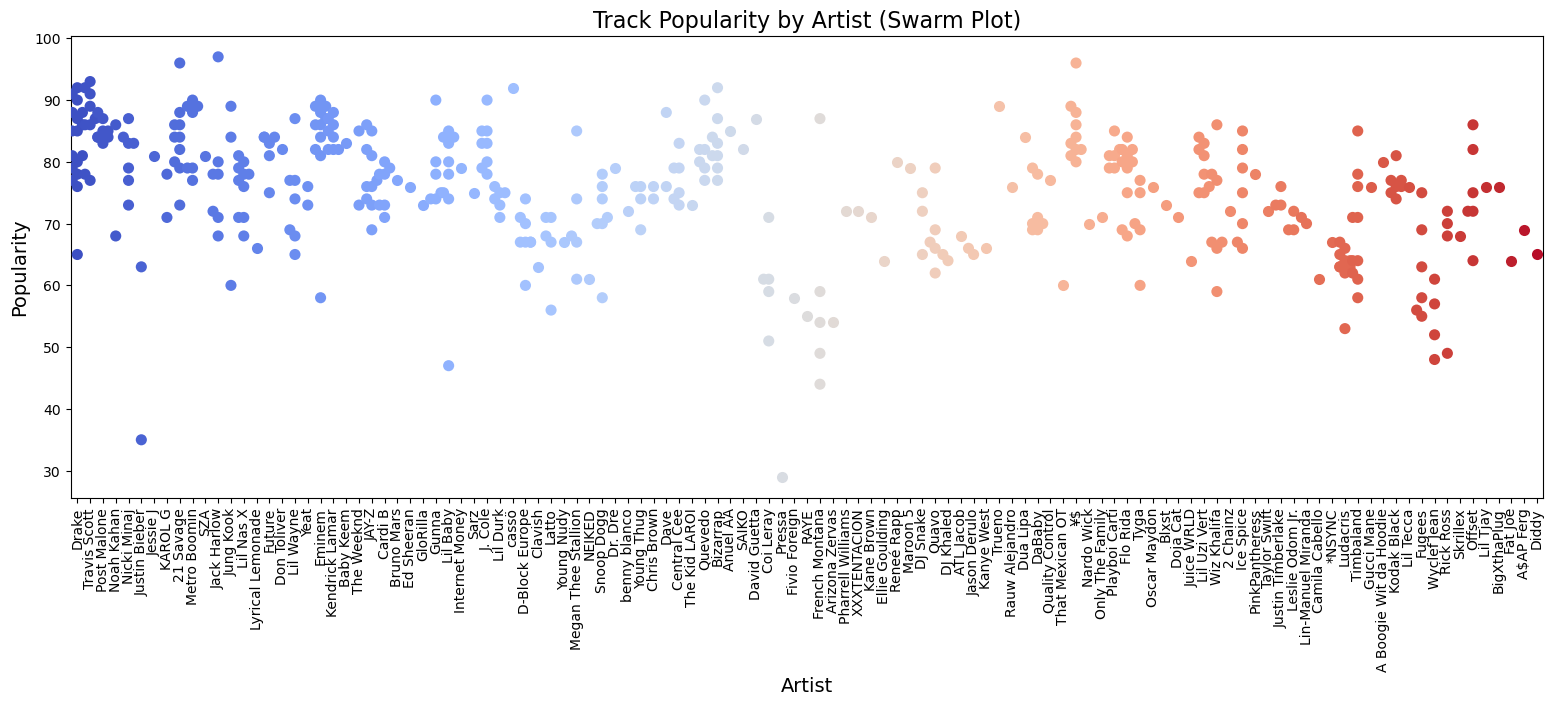

In [267]:
plt.figure(figsize=(19, 6))
sns.swarmplot(x='Artist', y='Popularity', data=df, palette='coolwarm', size=8)
plt.title('Track Popularity by Artist (Swarm Plot)', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.xticks(rotation = 90)
plt.ylabel('Popularity', fontsize=14)
plt.show()